<a href="https://colab.research.google.com/github/gopinathak-geek/novozymes-enzyme-stability-prediction/blob/main/sequence_to_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
from PIL import Image


```
def proteinSequenceToAmioAcidMolecularWeightWithPhAndLabel(data):
  amionAcidSequence = []
  img = []
  label = []
  for index, row in data.iterrows():
    ph = row['pH']
    tm = row['tm']
    molecularWeightOfAminoAcidInSequence = []
    pHofProteinSequence = []
    for aminoacid in (row['protein_sequence']):
      molecularWeight = getMolecularWeight(aminoacid)
      molecularWeightOfAminoAcidInSequence.append(molecularWeight/110)
      pHofProteinSequence.append(ph)
    a = np.array([molecularWeightOfAminoAcidInSequence,pHofProteinSequence])
    a = a[None, :]
    img.append(a)
    label.append(tm)
  return [img, label]



  from PIL import Image

image = Image.fromarray(data)

display(image)
  ```



In [127]:
def getAtom(atom=None, right=None, bottom=None, left=None, top = None):
  if(atom =='C'):
    color = [255, 255, 255]
  elif(atom == 'H'):
    color = [128, 128, 128]
  elif(atom == 'N'):
    color = [0, 0, 255]
  elif(atom == 'O'):
    color = [255, 0, 0]
  elif(atom == 'S'):
    color = [255, 255, 0]
  else:
    color = [0, 0, 0]

  atom = np.zeros((11, 11, 3), dtype=np.uint8)
  
  for x in range(2, 9):
    for y in range(2, 9):
      atom[x, y] = color
  
  if (right == 'single'):
    atom[5, 9] = color
    atom[5, 10] = color
  elif (right == 'double'):
    atom[4, 9] = color
    atom[4, 10] = color
    atom[6, 9] = color
    atom[6, 10] = color
  
  if (left == 'single'):
    atom[5, 0] = color
    atom[5, 1] = color
  elif (left == 'double'):
    atom[4, 0] = color
    atom[4, 1] = color
    atom[6, 0] = color
    atom[6, 1] = color

  if (top == 'single'):
    atom[0, 5] = color
    atom[1, 5] = color
  elif (top == 'double'):
    atom[0, 4] = color
    atom[1, 4] = color
    atom[0, 6] = color
    atom[1, 6] = color
  
  if (bottom == 'single'):
    atom[9, 5] = color
    atom[10, 5] = color
  elif (bottom == 'double'):
    atom[9, 4] = color
    atom[10, 4] = color
    atom[9, 6] = color
    atom[10, 6] = color
  
  return atom

def peptideBond():
  peptideBond = np.zeros((7, 11, 3), dtype=np.uint8)

  for x in range(0, 7):
    for y in range(0, 11):
      peptideBond[x, y] = [0, 0, 0]
    
  for x in range(2, 5):
    for y in range(0, 11):
      peptideBond[x, y] = [255, 165, 0]
  return peptideBond

def getDefaultAminoAcidStructure():
  '''
    H H O 
    | | ||
  H-N-C-C
    | | |
    H R O
  '''
  defaultStructure = np.zeros((29, 40, 3), dtype=np.uint8)
  
  #Alpha carbon
  for x in range(11, 18):
    for y in range(22, 29):
      defaultStructure[x, y] = [255, 255, 255]
  
  #Alpha carbon bonds
  defaultStructure[14, 20] = [255, 255, 255]
  defaultStructure[14, 21] = [255, 255, 255]
  defaultStructure[14, 29] = [255, 255, 255]
  defaultStructure[14, 30] = [255, 255, 255]
  defaultStructure[10, 25] = [255, 255, 255]
  defaultStructure[9, 25] = [255, 255, 255]
  defaultStructure[18, 25] = [255, 255, 255]
  defaultStructure[19, 25] = [255, 255, 255]
  
  #Nitrogen
  for x in range(11, 18):
    for y in range(11, 18):
      defaultStructure[x, y] = [0, 0, 255]
  
  #Nitrogen bonds
  defaultStructure[14, 9] = [0, 0, 255]
  defaultStructure[14, 10] = [0, 0, 255]
  defaultStructure[14, 18] = [0, 0, 255]
  defaultStructure[14, 19] = [0, 0, 255]
  defaultStructure[10, 14] = [0, 0, 255]
  defaultStructure[9, 14] = [0, 0, 255]
  defaultStructure[18, 14] = [0, 0, 255]
  defaultStructure[19, 14] = [0, 0, 255]
  
  #carboxyl carbon
  for x in range(11, 18):
    for y in range(33, 40):
      defaultStructure[x, y] = [255, 255, 255]
  
  #carboxyl carbon bonds
  defaultStructure[14, 31] = [255, 255, 255]
  defaultStructure[14, 32] = [255, 255, 255]
  defaultStructure[9, 35] = [255, 255, 255]
  defaultStructure[10, 35] = [255, 255, 255]
  defaultStructure[9, 37] = [255, 255, 255]
  defaultStructure[10, 37] = [255, 255, 255]
  defaultStructure[18, 36] = [255, 255, 255]
  defaultStructure[19, 36] = [255, 255, 255]

  #Hydrogen alpha
  for x in range(0, 7):
    for y in range(22, 29):
      defaultStructure[x, y] = [128, 128, 128]

  # Hydrogen alpha bond
  defaultStructure[7, 25] = [128, 128, 128]
  defaultStructure[8, 25] = [128, 128, 128]

  #Hydrogen - Amino group
  for x in range(0, 7):
    for y in range(11, 18):
      defaultStructure[x, y] = [128, 128, 128]

  # Hydrogen - Amino group bond
  defaultStructure[7, 14] = [128, 128, 128]
  defaultStructure[8, 14] = [128, 128, 128]
  
  #Hydrogen 1 - Amino group
  for x in range(11, 18):
    for y in range(0, 7):
      defaultStructure[x, y] = [128, 128, 128]

  # Hydrogen 1- Amino group bond
  defaultStructure[14, 7] = [128, 128, 128]
  defaultStructure[14, 8] = [128, 128, 128]

  #Hydrogen 2- Amino group
  for x in range(22, 29):
    for y in range(11, 18):
      defaultStructure[x, y] = [128, 128, 128]
  
  # Hydrogen 2- Amino group bond
  defaultStructure[20, 14] = [128, 128, 128]
  defaultStructure[21, 14] = [128, 128, 128]

  #carboxyl oxygen sharing
  for x in range(0, 7):
    for y in range(33, 40):
      defaultStructure[x, y] = [255, 0, 0]
  
  #carboxyl oxygen sharing bond
  defaultStructure[7, 35] = [255, 0, 0]
  defaultStructure[8, 35] = [255, 0, 0]
  defaultStructure[7, 37] = [255, 0, 0]
  defaultStructure[8, 37] = [255, 0, 0]

  #carboxyl oxygen 
  for x in range(22, 29):
    for y in range(33, 40):
      defaultStructure[x, y] = [255, 0, 0]
  
  #carboxyl oxygen bond
  defaultStructure[20, 36] = [255, 0, 0]
  defaultStructure[21, 36] = [255, 0, 0]
  
  return defaultStructure


def getGlycine():
  standardStructure = getDefaultAminoAcidStructure()
  hydrogen = getAtom(atom = 'H', top ='single')
  glycine = np.zeros((40, 40, 3), dtype=np.uint8)
  glycine[0:standardStructure.shape[0], 0:standardStructure.shape[1]] = standardStructure
  glycine[20+0:20+11, 20+0:20+11] = hydrogen
  return glycine

def aminoAcidToStructure(aminoAcid):
  if aminoAcid == "G":
    return getGlycine()
  elif aminoAcid == "A":
    pass

def proteinSequenceToPrimaryStrcure():
  proteinSequence = "GGGGGG"
  
  primaryStructure = np.empty(shape=(0,0,3))
  for aminoAcid in proteinSequence:
    previousShapeY = primaryStructure.shape[0]
    previousShapeX = primaryStructure.shape[1]
    
    currentStructureOfAminoAcid = aminoAcidToStructure(aminoAcid)
    currentShapeY = currentStructureOfAminoAcid.shape[0]
    currentShapeX = currentStructureOfAminoAcid.shape[1]
    if previousShapeX > 0:
      #remove oxygen
      ro = getAtom(atom= None, top='single')
      primaryStructure[20:20+11, previousShapeX-11:previousShapeX-11+11] = ro
      primaryStructure[18, previousShapeX-4] = [0, 0, 0]
      primaryStructure[19, previousShapeX-4] = [0, 0, 0]
      

      # remove oxygen 
      rh = getAtom(atom= None, bottom='single')
      currentStructureOfAminoAcid[0:11, 0+10:11+10] = rh
      currentStructureOfAminoAcid[9, 14] = [0, 0, 0]
      currentStructureOfAminoAcid[10, 14] = [0, 0, 0]
      
      # remove oxygen and create peptidebond
      pb = peptideBond()
      currentStructureOfAminoAcid[11:18, 0:11] = pb

    if (currentShapeY > previousShapeY):
      newShapeY =  currentShapeY
    else:
      newShapeY = previousShapeY
    
    newShapeX = previousShapeX+currentShapeX
    newPrimaryStructure = np.zeros((newShapeY, newShapeX, 3), dtype=np.uint8)
    newPrimaryStructure[0:previousShapeY, 0:previousShapeX] = primaryStructure
    
    newPrimaryStructure[0:currentStructureOfAminoAcid.shape[0], previousShapeX:previousShapeX+currentStructureOfAminoAcid.shape[1]] = currentStructureOfAminoAcid

    primaryStructure = newPrimaryStructure

  return primaryStructure

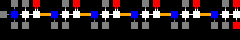

In [128]:
a= proteinSequenceToPrimaryStrcure()
image = Image.fromarray(a)
display(image)


In [129]:
a= peptideBond()
image = Image.fromarray(a)
display(image)